In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('titanic_dataset (1).csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# viewing shape of the data
data.shape

(891, 12)

In [5]:
# summary statistics of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# viewing datatypes of columns
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# viewing whether there are missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# dropping columns that don't contribute to the target , cabin has more number of null values which
# cannot be filled so removing cabin also
data1 = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [9]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# filling missing values in age column with median
data1['Age'] = data1['Age'].fillna(data1['Age'].median())

In [11]:
data1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
# filling missing values in embarked column with modt occuring embarked value
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])

In [13]:
data1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

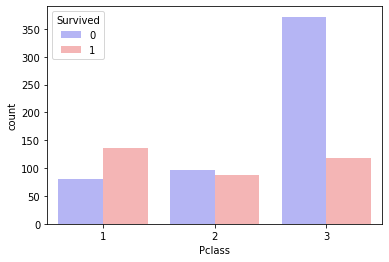

In [14]:
# viewing how Pclass affects Survival
sns.countplot(x='Pclass',data=data1, hue='Survived',palette='bwr');

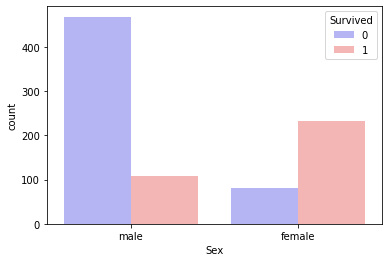

In [15]:
# viewing how Sex affects Survival
sns.countplot(x='Sex',data=data1, hue='Survived', palette='bwr');

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
data1['Sex'] = le.fit_transform(data1['Sex'])
data1['Embarked'] = le.fit_transform(data1['Embarked'])

In [18]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
data1['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
# function to make all values in age column to age_bands
def age_band(n):
    if n <=16:
        return '1'
    elif n >16 and n <= 32:
        return '2'
    elif n >32 and n <= 48:
        return '3'
    elif n > 48:
        return '4'

In [21]:
#creating to new age_band column
data1['Age_band'] = data1['Age'].apply(lambda x:age_band(x))

In [22]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,3


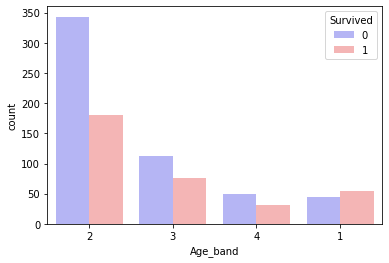

In [23]:
# how each age_band affects survival rate
sns.countplot(x='Age_band',data=data1, hue='Survived',palette='bwr');

In [24]:
# dropping Age column
data1.drop('Age',axis=1,inplace=True)

In [25]:
data1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_band
0,0,3,1,1,0,7.2500,2,2
1,1,1,0,1,0,71.2833,0,3
2,1,3,0,0,0,7.9250,2,2
3,1,1,0,1,0,53.1000,2,3
4,0,3,1,0,0,8.0500,2,3


### SVM

In [26]:
# Split data into feature and target
X = data1.drop('Survived', axis=1)
y = data1['Survived']

### Hold-out cross validation

In [27]:
# split into train and test set
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.svm import SVC

In [30]:
# fitting to svm model
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred_svm)

0.7821229050279329

### k-fold cross validation(SVM)

In [33]:
from sklearn.model_selection import KFold

In [34]:
kfold_validator = KFold(10)

In [35]:
kfold_validator.split(X, y)

<generator object _BaseKFold.split at 0x000001C86F09E648>

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cv_result = cross_val_score(svm_clf, X, y, cv=kfold_validator)

In [38]:
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [39]:
# average of k-fold cross validation
print('Average accuracy score of k-fold (SVM) ',np.mean(cv_result))

Average accuracy score of k-fold (SVM)  0.786729088639201


### Stratified k-fold cross-validation(SVM)

In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
skfold_validator = StratifiedKFold(n_splits=10)

In [42]:
skfold_validator.split(X, y)

<generator object _BaseKFold.split at 0x000001C86F09EA48>

In [43]:
skcv_result = cross_val_score(svm_clf, X, y, cv=skfold_validator)

In [44]:
skcv_result

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [45]:
# average of stratified k-fold cross validation
print('Average accuracy score of stratified k-fold (SVM) ',np.mean(skcv_result))

Average accuracy score of stratified k-fold (SVM)  0.786729088639201


### kNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#### Hold-out cross-validation

In [48]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

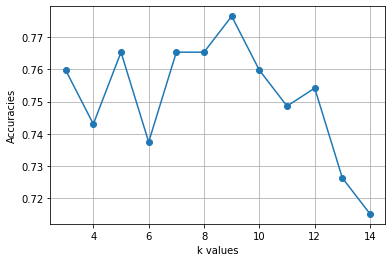

In [49]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [50]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=9)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [51]:
#finding accuracy
accuracy_score(y_test, y_pred_kNN)

0.776536312849162

### k-fold cross-validation(kNN)

In [52]:
kfold_validator = KFold(10)

In [53]:
kfold_validator.split(X, y)

<generator object _BaseKFold.split at 0x000001C86F1A0D48>

In [54]:
cv_result1 = cross_val_score(classifier, X, y, cv=kfold_validator)

In [55]:
cv_result1 

array([0.68888889, 0.75280899, 0.70786517, 0.74157303, 0.78651685,
       0.82022472, 0.76404494, 0.74157303, 0.76404494, 0.78651685])

In [56]:
# average of k-fold cross validation
print('Average accuracy score of k-fold (kNN) ',np.mean(cv_result1))

Average accuracy score of k-fold (kNN)  0.7554057428214732


### stratified k-fold cross-validation(kNN)

In [57]:
skfold_validator = StratifiedKFold(n_splits=10)

In [58]:
skfold_validator.split(X, y)

<generator object _BaseKFold.split at 0x000001C86F22A2C8>

In [59]:
skcv_result1 = cross_val_score(classifier, X, y, cv=skfold_validator)

In [60]:
skcv_result1

array([0.7       , 0.71910112, 0.70786517, 0.76404494, 0.79775281,
       0.74157303, 0.79775281, 0.75280899, 0.75280899, 0.7752809 ])

In [61]:
# average of stratified k-fold cross validation
print('Average accuracy score of stratified k-fold (kNN) ',np.mean(skcv_result1))

Average accuracy score of stratified k-fold (kNN)  0.7508988764044944
